# **Model Ranking Wiyh Seperation Index (SI)**
##Dataset: CIFAR10 and Fashion-MNIST

## **CIFAR10 With Pretrain EfficientNetB0**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, Conv2D, MaxPooling2D  , Softmax, BatchNormalization, LayerNormalization , Add, Flatten
from keras.models import Sequential
from keras import optimizers
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Importing drive for save models and pictures:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Data:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Select a Subset For SI Calculation:

In [ ]:
_, X_subset, _, y_subset = train_test_split(x_test, y_test, test_size=0.50, random_state=0)
Class = np.zeros(10)
for i in range(len( y_subset)):
  Class[y_subset[i]] = Class[y_subset[i]] + 1
Class = pd.DataFrame(Class)
print("The number of each class members in the subset:")
Class

The number of each class members in the subset:


,0
0,472.0
1,510.0
2,498.0
3,492.0
4,501.0
5,495.0
6,493.0
7,501.0
8,516.0
9,522.0


Plot Images:

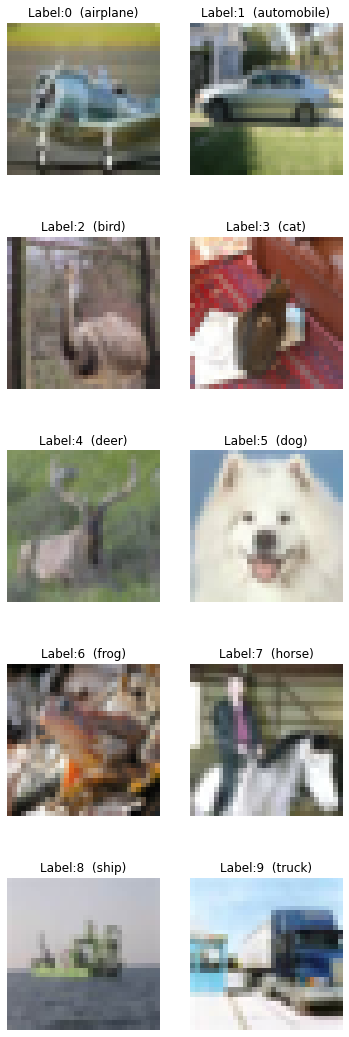

In [ ]:
fig = plt.figure(figsize=(6, 19))
fig.add_subplot(5, 2, 1)
plt.imshow(X_subset[np.where(y_subset==0)[0][0]])
plt.axis('off')
plt.title('Label:0  (airplane)')
fig.add_subplot(5, 2, 2)
plt.imshow(X_subset[np.where(y_subset==1)[0][0]])
plt.axis('off')
plt.title('Label:1  (automobile)')
fig.add_subplot(5, 2, 3)
plt.imshow(X_subset[np.where(y_subset==2)[0][0]])
plt.axis('off')
plt.title('Label:2  (bird)')
fig.add_subplot(5, 2, 4)
plt.imshow(X_subset[np.where(y_subset==3)[0][0]])
plt.axis('off')
plt.title('Label:3  (cat)')
fig.add_subplot(5, 2, 5)
plt.imshow(X_subset[np.where(y_subset==4)[0][0]])
plt.axis('off')
plt.title('Label:4  (deer)')
fig.add_subplot(5, 2, 6)
plt.imshow(X_subset[np.where(y_subset==5)[0][0]])
plt.axis('off')
plt.title('Label:5  (dog)')
fig.add_subplot(5, 2, 7)
plt.imshow(X_subset[np.where(y_subset==6)[0][0]])
plt.axis('off')
plt.title('Label:6  (frog)')
fig.add_subplot(5, 2, 8)
plt.imshow(X_subset[np.where(y_subset==7)[0][0]])
plt.axis('off')
plt.title('Label:7  (horse)')
fig.add_subplot(5, 2, 9)
plt.imshow(X_subset[np.where(y_subset==8)[0][0]])
plt.axis('off')
plt.title('Label:8  (ship)')
fig.add_subplot(5, 2, 10)
plt.imshow(X_subset[np.where(y_subset==9)[0][0]])
plt.axis('off')
plt.title('Label:9  (truck)')
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/CIFAR10.jpg')

Define Total SI Calculator with The Help of Nearest Neighbor classifier:

In [ ]:
def SI(x_embed,y_embed):  
  x_embed = np.array(x_embed)
  si = KNeighborsClassifier(n_neighbors=1)
  cont = 0
  for i in range (len(y_embed)):
    x_emb =np.delete(x_embed, i, 0)
    y_emb =np.delete(y_embed, i, 0)
    si.fit(x_emb, y_emb.reshape(len(y_embed)-1))
    emb = x_embed[i].reshape(1 ,len(x_embed[i]))
    if(si.predict(emb)==y_embed[i]):
      cont = cont+1
  return cont/len(y_embed)

Define a SI Base Label Predictor To Calculate SI Between Classes with The Help of Nearest Neighbor classifier:

In [ ]:
def SI_Predict(x_embed,y_embed):  
  x_embed = np.array(x_embed)
  y_pred = np.zeros(len(y_embed))
  si = KNeighborsClassifier(n_neighbors=1)
  for i in range (len(y_embed)):
    x_emb =np.delete(x_embed, i, 0)
    y_emb =np.delete(y_embed, i, 0)
    si.fit(x_emb, y_emb.reshape(len(y_embed)-1))
    emb = x_embed[i].reshape(1 ,len(x_embed[i]))
    y_pred[i] = si.predict(emb)
  return y_pred

Define EfficientNetB0:

In [ ]:
def EfficientNet_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.EfficientNetB0(include_top=False,weights="imagenet",input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
EFB0_MODEL = EfficientNet_generator(input_shape = (32, 32, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
EFB0_MODEL.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 Flat (Flatten)              (None, 1280)              0         
                                                                 
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
_________________________________________________________________


Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


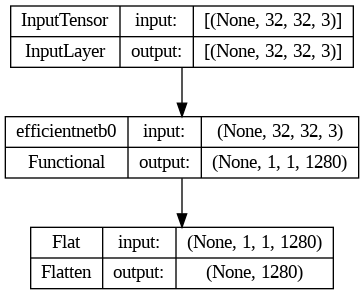

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(EFB0_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/ef_model.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = EFB0_MODEL(X_subset)

Calculation of  Total SI:

In [ ]:
SI(emb,y_subset)

0.3754

Calculation SI for each class:

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


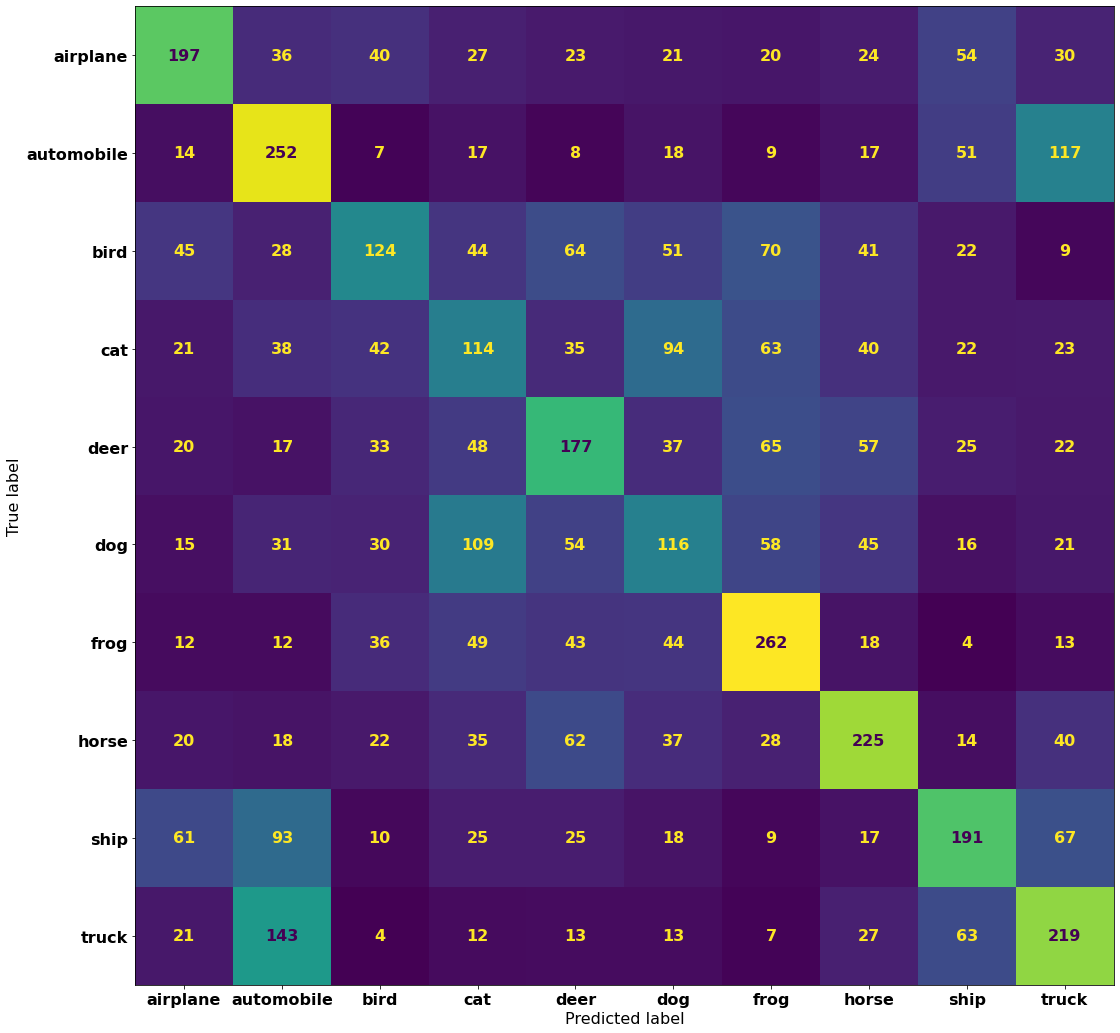

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_1.jpg')

## **CIFAR10 With Pretrain VGG16**

Define VGG16:

In [ ]:
def VGG16_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
VGG16_MODEL = VGG16_generator(input_shape = (32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_MODEL.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 Flat (Flatten)              (None, 512)               0         
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


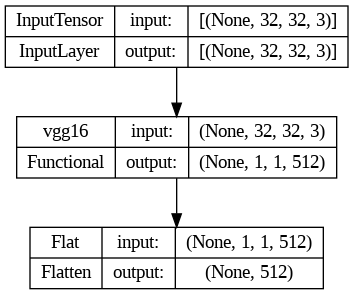

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(VGG16_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/Vgg_model.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = VGG16_MODEL(X_subset)

In [ ]:
SI(emb,y_subset)

0.3864

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


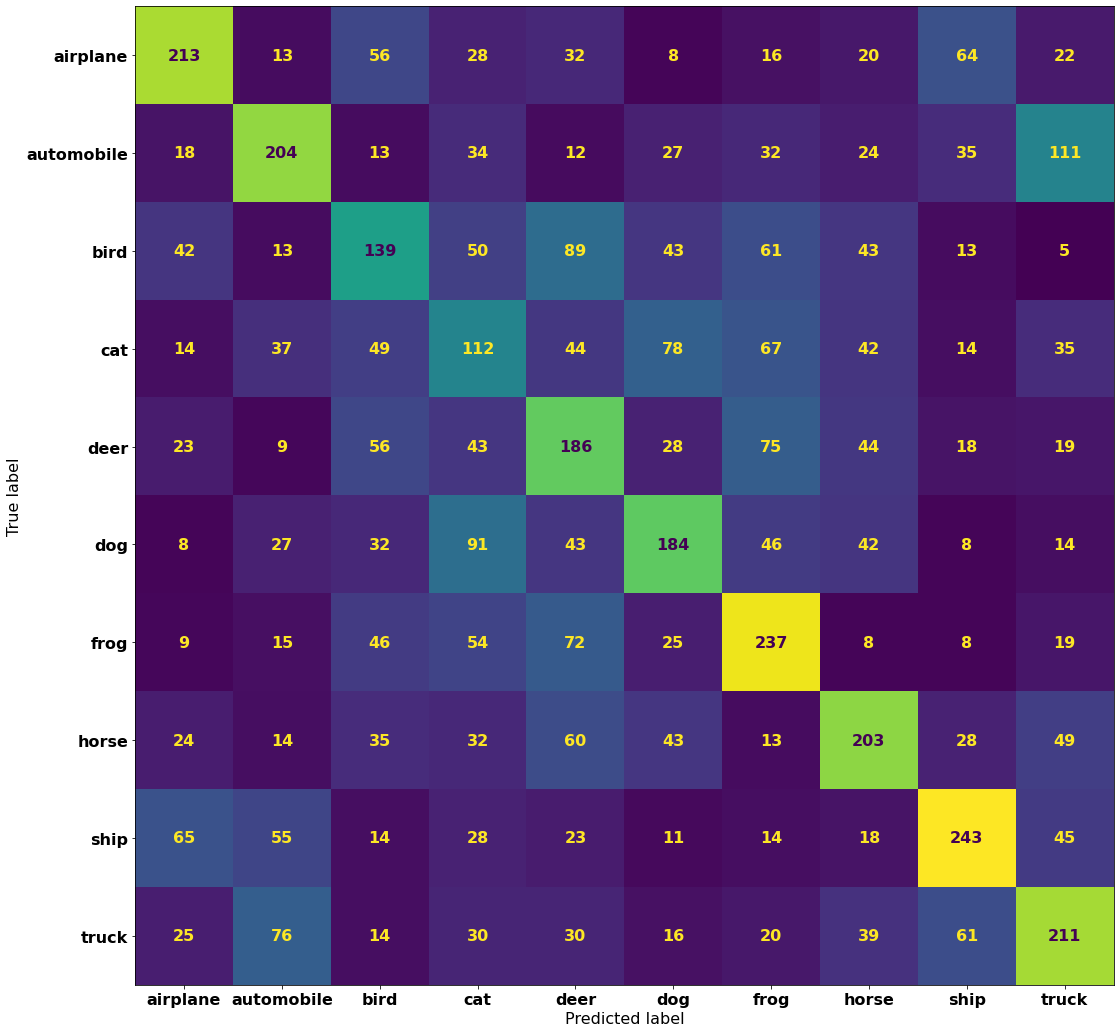

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_vgg_cifar10.jpg')

## **CIFAR10 With Pretrain MobileNetV2**

Define MobileNetV2:

In [ ]:
def MobileNetV2_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.MobileNetV2(include_top=False,weights="imagenet",input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
MobileNetV2_MODEL = MobileNetV2_generator(input_shape = (32, 32, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
MobileNetV2_MODEL.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 Flat (Flatten)              (None, 1280)              0         
                                                                 
Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
_________________________________________________________________


Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


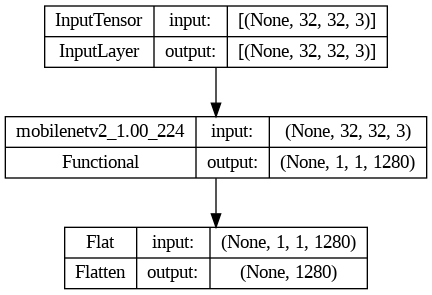

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(MobileNetV2_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/MobileNetV2_model.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = MobileNetV2_MODEL(X_subset)

In [ ]:
SI(emb,y_subset)

0.148

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


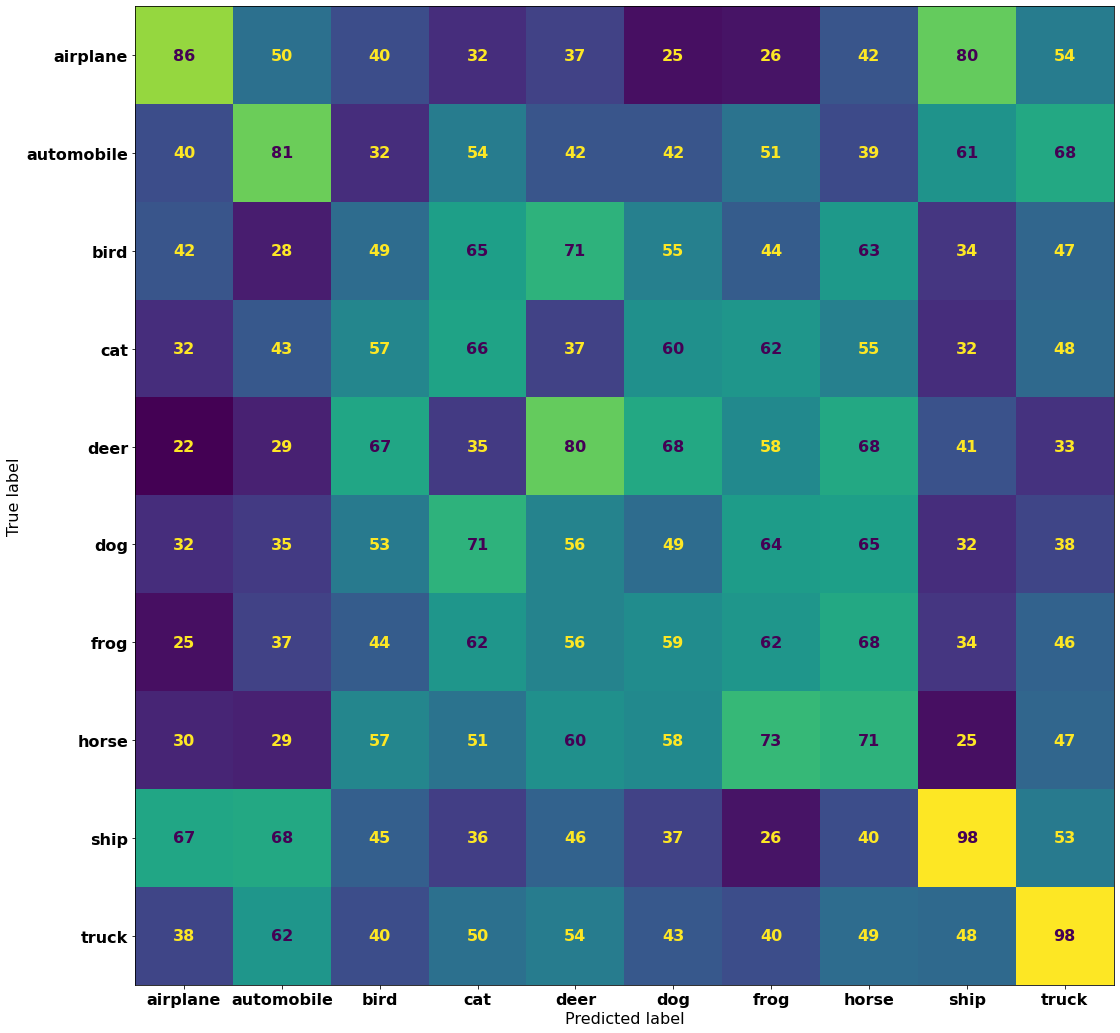

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['airplane','automobile','bird','cat','deer','dog','frog',	'horse','ship','truck'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_MobileNetV2_cifar10.jpg')

# **Fashion-MNIST**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Select a Subset For SI Calculation:

In [ ]:
_, X_subset, _, y_subset = train_test_split(x_test, y_test, test_size=0.50, random_state=0)
Class = np.zeros(10)
for i in range(len( y_subset)):
  Class[y_subset[i]] = Class[y_subset[i]] + 1
Class = pd.DataFrame(Class)
print("The number of each class members in the subset:")
Class

The number of each class members in the subset:


,0
0,474.0
1,498.0
2,515.0
3,495.0
4,497.0
5,507.0
6,483.0
7,514.0
8,510.0
9,507.0


Plot Images:

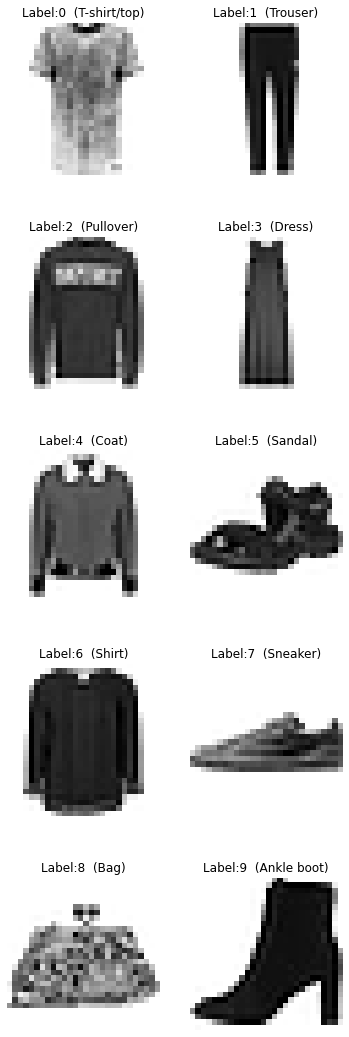

In [ ]:

fig = plt.figure(figsize=(6, 19))
fig.add_subplot(5, 2, 1)
plt.imshow(X_subset[np.where(y_subset==0)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:0  (T-shirt/top)')
fig.add_subplot(5, 2, 2)
plt.imshow(X_subset[np.where(y_subset==1)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:1  (Trouser)')
fig.add_subplot(5, 2, 3)
plt.imshow(X_subset[np.where(y_subset==2)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:2  (Pullover)')
fig.add_subplot(5, 2, 4)
plt.imshow(X_subset[np.where(y_subset==3)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:3  (Dress)')
fig.add_subplot(5, 2, 5)
plt.imshow(X_subset[np.where(y_subset==4)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:4  (Coat)')
fig.add_subplot(5, 2, 6)
plt.imshow(X_subset[np.where(y_subset==5)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:5  (Sandal)')
fig.add_subplot(5, 2, 7)
plt.imshow(X_subset[np.where(y_subset==6)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:6  (Shirt)')
fig.add_subplot(5, 2, 8)
plt.imshow(X_subset[np.where(y_subset==7)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:7  (Sneaker)')
fig.add_subplot(5, 2, 9)
plt.imshow(X_subset[np.where(y_subset==8)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:8  (Bag)')
fig.add_subplot(5, 2, 10)
plt.imshow(X_subset[np.where(y_subset==9)[0][0]],cmap='binary')
plt.axis('off')
plt.title('Label:9  (Ankle boot)')
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/FM.jpg')

Changing Size and Number Of Channels Of the Input Pictures To The Allowable Size and Number Of Channels For These Architectures.

In [ ]:
X_Subset = np.zeros((len(X_subset),32,32,3),dtype=np.uint8)
for i in range(len(X_subset)):
  for j in range(3):
    X_Subset[i,2:30,2:30,j]=X_subset[i,:]

Plot Changed Images:

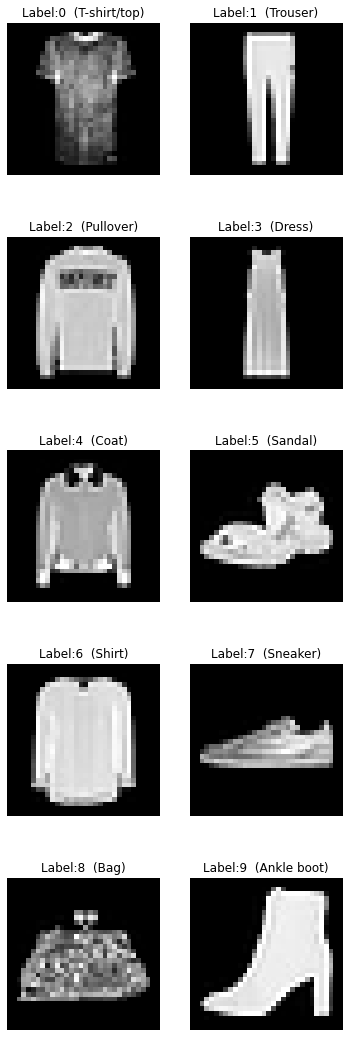

In [ ]:
fig = plt.figure(figsize=(6, 19))
fig.add_subplot(5, 2, 1)
plt.imshow(X_Subset[np.where(y_subset==0)[0][0]])
plt.axis('off')
plt.title('Label:0  (T-shirt/top)')
fig.add_subplot(5, 2, 2)
plt.imshow(X_Subset[np.where(y_subset==1)[0][0]])
plt.axis('off')
plt.title('Label:1  (Trouser)')
fig.add_subplot(5, 2, 3)
plt.imshow(X_Subset[np.where(y_subset==2)[0][0]])
plt.axis('off')
plt.title('Label:2  (Pullover)')
fig.add_subplot(5, 2, 4)
plt.imshow(X_Subset[np.where(y_subset==3)[0][0]])
plt.axis('off')
plt.title('Label:3  (Dress)')
fig.add_subplot(5, 2, 5)
plt.imshow(X_Subset[np.where(y_subset==4)[0][0]])
plt.axis('off')
plt.title('Label:4  (Coat)')
fig.add_subplot(5, 2, 6)
plt.imshow(X_Subset[np.where(y_subset==5)[0][0]])
plt.axis('off')
plt.title('Label:5  (Sandal)')
fig.add_subplot(5, 2, 7)
plt.imshow(X_Subset[np.where(y_subset==6)[0][0]])
plt.axis('off')
plt.title('Label:6  (Shirt)')
fig.add_subplot(5, 2, 8)
plt.imshow(X_Subset[np.where(y_subset==7)[0][0]])
plt.axis('off')
plt.title('Label:7  (Sneaker)')
fig.add_subplot(5, 2, 9)
plt.imshow(X_Subset[np.where(y_subset==8)[0][0]])
plt.axis('off')
plt.title('Label:8  (Bag)')
fig.add_subplot(5, 2, 10)
plt.imshow(X_Subset[np.where(y_subset==9)[0][0]])
plt.axis('off')
plt.title('Label:9  (Ankle boot)')
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/FMChange.jpg')

## **Fashion-MNIST With Pretrain EfficientNetB0**

Define EfficientNetB0:

In [ ]:
def EfficientNet_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.EfficientNetB0(include_top=False,weights=None,input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
EFB0_MODEL = EfficientNet_generator(input_shape = (32, 32,3))

In [ ]:
EFB0_MODEL.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 Flat (Flatten)              (None, 1280)              0         
                                                                 
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
_________________________________________________________________


Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


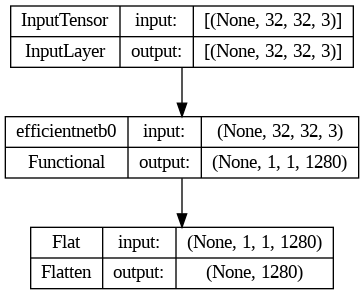

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(EFB0_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/ef2_model.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = EFB0_MODEL(X_Subset)

Calculation of  Total SI:

In [ ]:
SI(emb,y_subset)

0.7326

Calculation SI for each class:

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


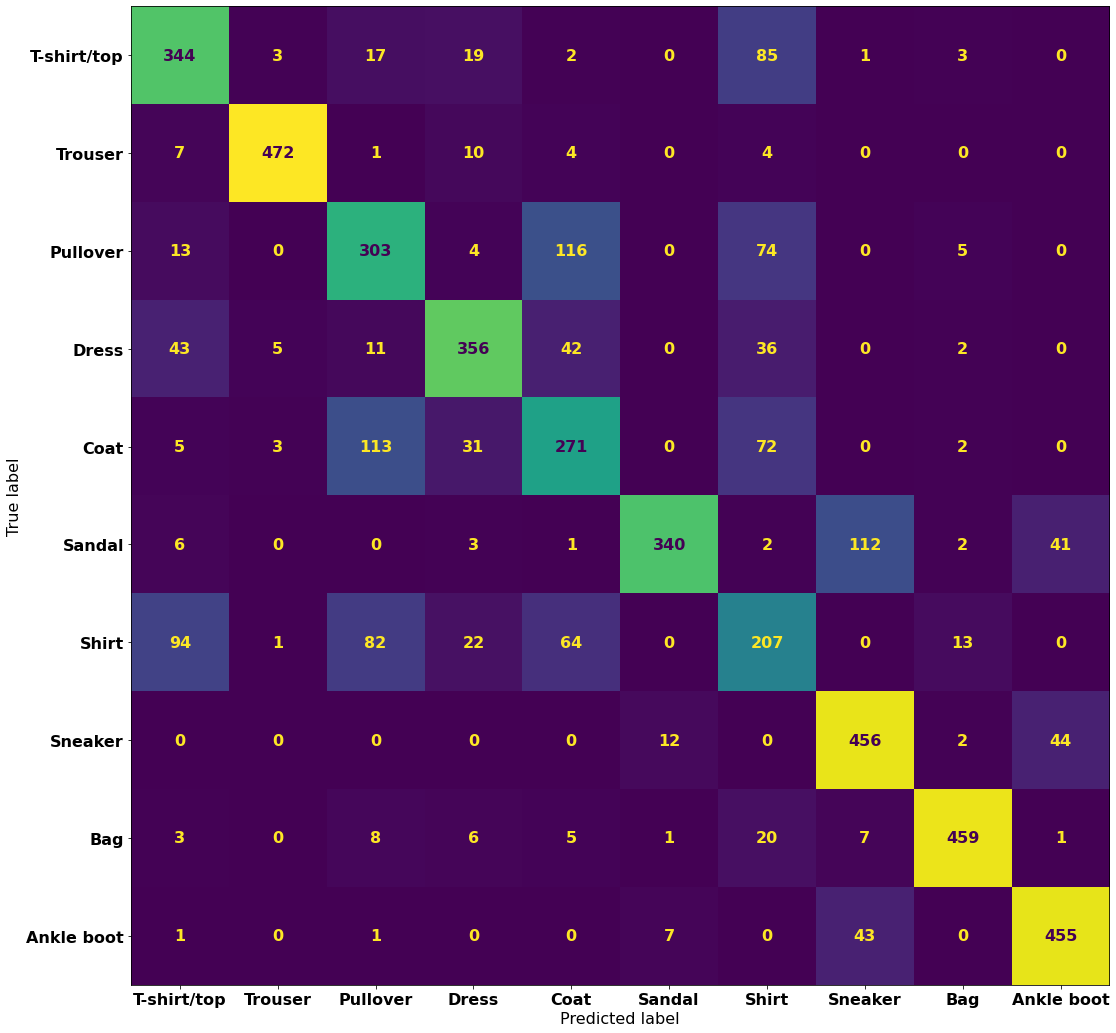

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',	'Sneaker','Bag','Ankle boot'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_2.jpg')

## **Fashion-MNIST With Pretrain VGG16**

Define VGG16:

In [ ]:
def VGG16_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
VGG16_MODEL = VGG16_generator(input_shape = (32, 32, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
VGG16_MODEL.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 Flat (Flatten)              (None, 512)               0         
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


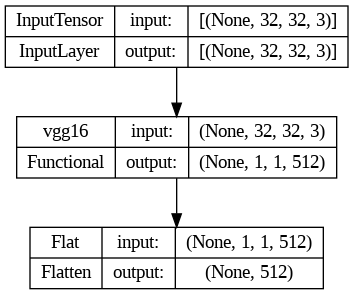

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(VGG16_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/Vgg_model2.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = VGG16_MODEL(X_Subset)

In [ ]:
SI(emb,y_subset)

0.7504

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


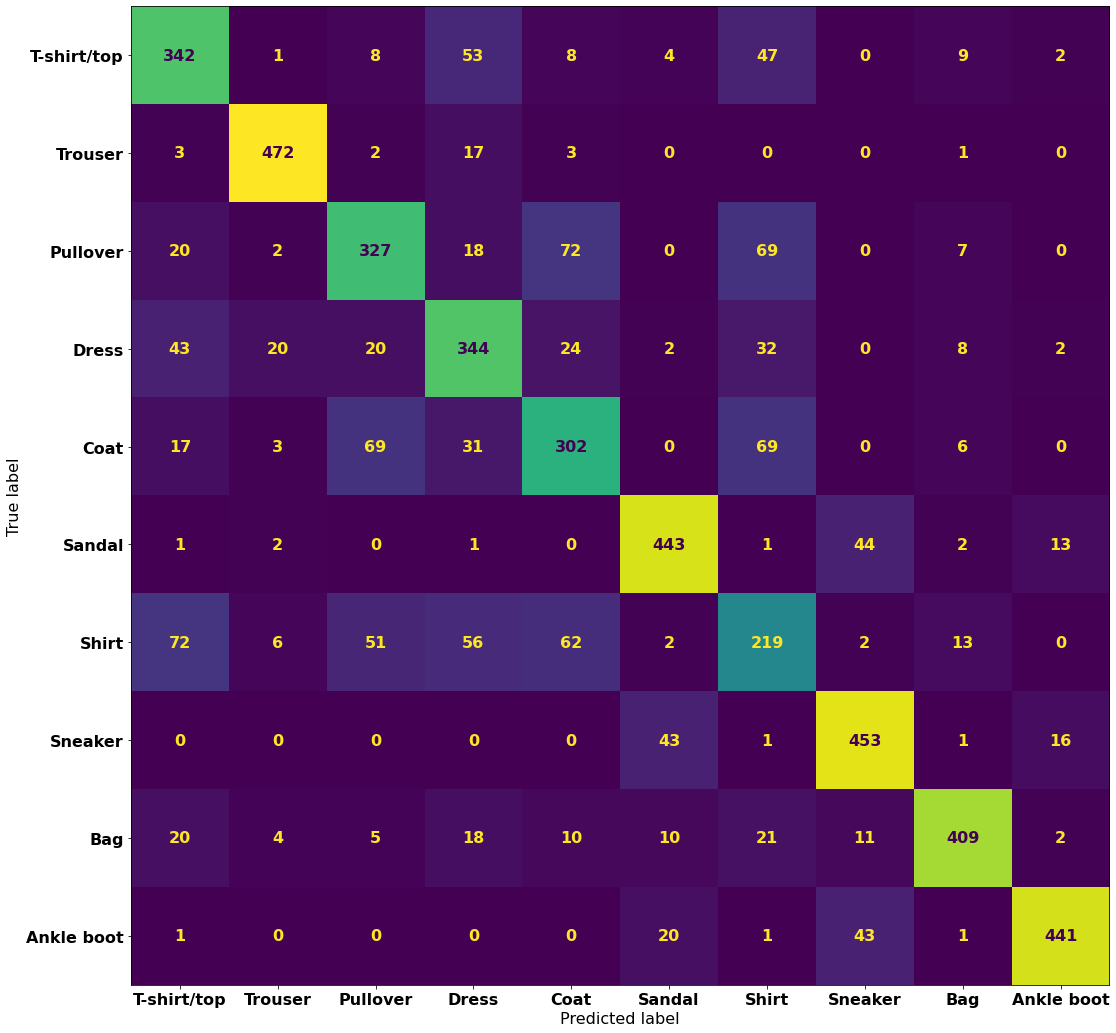

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',	'Sneaker','Bag','Ankle boot'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_vgg_FM.jpg')

## **Fashion-MNIST With Pretrain MobileNetV2**

Define MobileNetV2:

In [ ]:
def MobileNetV2_generator(input_shape):
  inputs = Input(shape =input_shape , name='InputTensor')
  x = inputs 
  x = keras.applications.MobileNetV2(include_top=False,weights="imagenet",input_shape=input_shape)(x)
  # Flat Layer:
  x = Flatten(name='Flat')(x)
  outputs =  x 
  return Model(inputs, outputs)

In [ ]:
MobileNetV2_MODEL = MobileNetV2_generator(input_shape = (32, 32, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
MobileNetV2_MODEL.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputTensor (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 Flat (Flatten)              (None, 1280)              0         
                                                                 
Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
_________________________________________________________________


Plot The Model:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


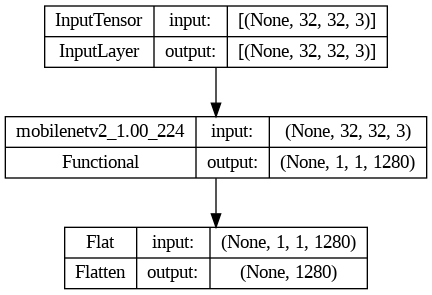

In [ ]:
drive.mount('/content/drive')
keras.utils.plot_model(MobileNetV2_MODEL, to_file="/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/MobileNetV2_model2.png", show_shapes=True)

Embeding Space:

In [ ]:
emb = MobileNetV2_MODEL(X_Subset)

In [ ]:
SI(emb,y_subset)

0.4438

In [ ]:
y_p = SI_Predict(emb,y_subset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


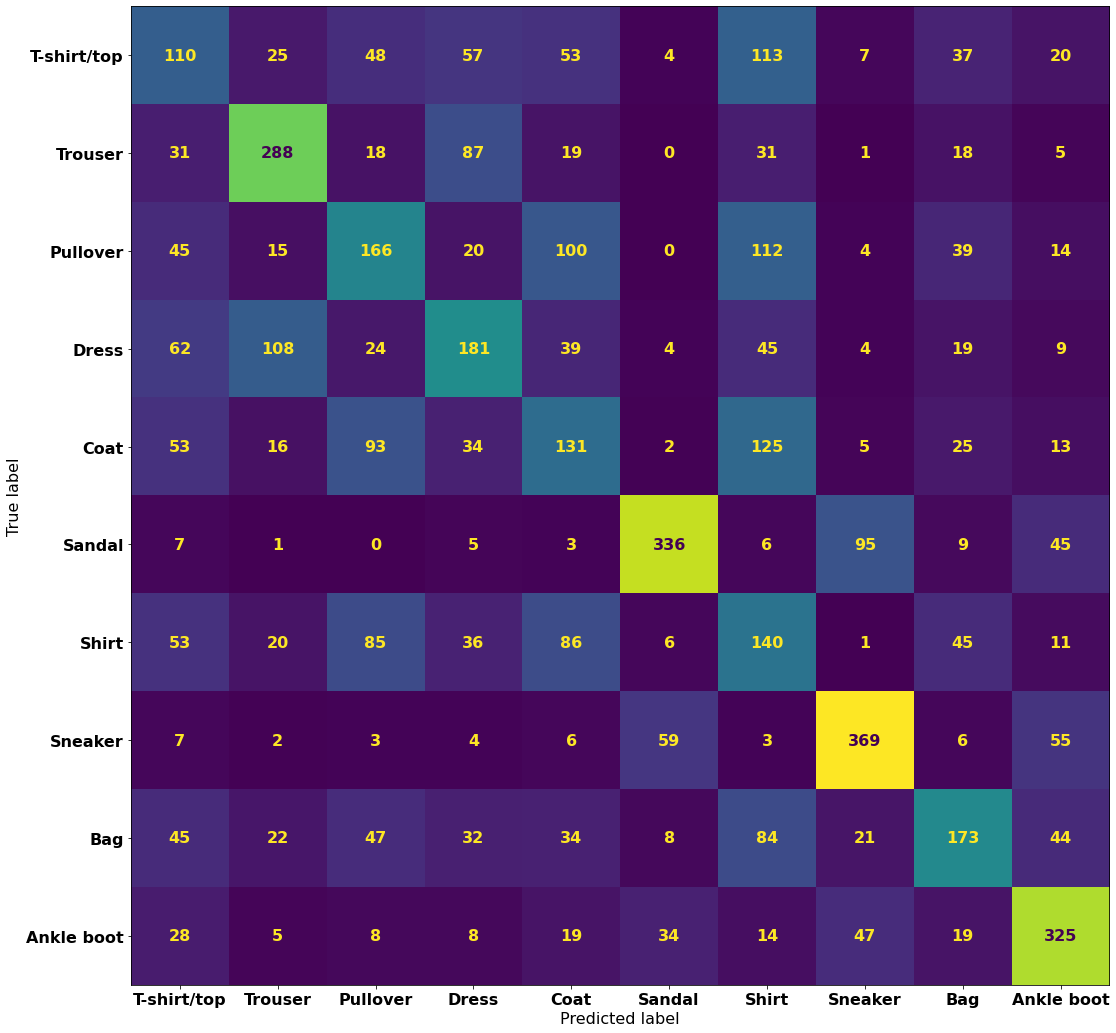

In [ ]:
drive.mount('/content/drive')
cm = confusion_matrix(y_subset,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',	'Sneaker','Bag','Ankle boot'])
fig, ax = plt.subplots(figsize=(18,18))
font = {'family' : 'normal','weight' : 'bold','size'   : 16}
plt.rc('font', **font)
disp.plot(ax=ax, colorbar=False)
fig.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/Project/cm_MobileNetV2_EF.jpg')